<a href="https://colab.research.google.com/github/jin-raii/Handwritten-digits-using-Deep-Learning/blob/main/NeuralNetwork_Hand_written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


### Split dataset into train and test

In [82]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [83]:
len(X_train)

60000

Text(0.5, 1.0, '5')

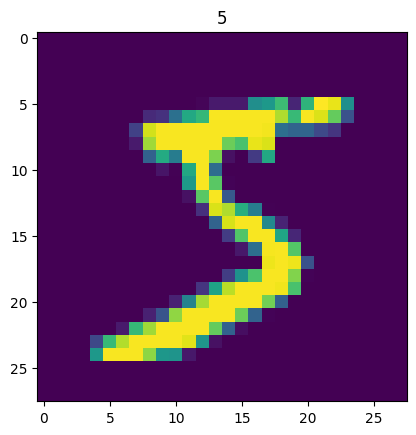

In [84]:
plt.imshow(X_train[0])
plt.title(y_train[0])

In [85]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [86]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

### without scaling image vector we got like 0.09 accuracy so need to scale image to 0 - 1 by dividing image vector 255 so we get 0 - 1 value

In [87]:
X_train = X_train / 255
X_test = X_test / 255

### Flatten 2D image to 1D vector
- because, Dense array expects 1D array instead of 2D array
  -- eg: (60000, 28, 28) -> (6000, 728)

- if used in CNN no need to flatten image

In [89]:
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

print(f'before flattend: {X_train.shape}  after flattend: {X_train_flattend.shape}')

before flattend: (60000, 28, 28)  after flattend: (60000, 784)


In [90]:
X_train_flattend.shape[1]

784

### Pass flattend image shape 784 to Dense Neuron and 10 as a output

In [99]:
model = models.Sequential([
    layers.Dense(10, input_shape=(X_train_flattend.shape[1],), activation='sigmoid')
])
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# train model
model.fit(X_train_flattend, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8170 - loss: 0.7173
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9142 - loss: 0.3114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9205 - loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9223 - loss: 0.2748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9285 - loss: 0.2607


In [100]:
model.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.3012


[0.2639857828617096, 0.9271000027656555]

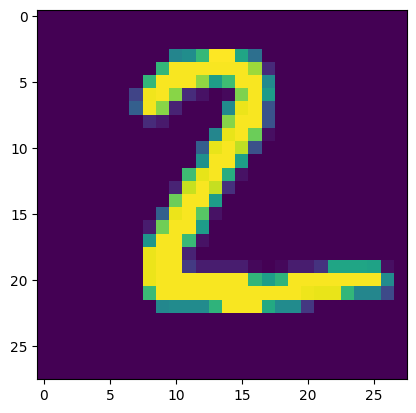

In [101]:
plt.imshow(X_test[1])

In [102]:
y_pred = model.predict(X_test_flattend)
y_pred[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.5749575e-01, 3.1504694e-03, 9.9955899e-01, 3.3082384e-01,
       4.4440937e-10, 8.0310231e-01, 7.9715836e-01, 5.4810307e-13,
       1.1076180e-01, 3.9518913e-09], dtype=float32)

In [104]:
np.argmax(y_pred[1])

np.int64(2)

### Confusion Matrix to evaluate model performance

### convert y_pred array to class labels
- from this
    ``` [3.5749575e-01, 3.1504694e-03, 9.9955899e-01, 3.3082384e-01,
          4.4440937e-10, 8.0310231e-01, 7.9715836e-01, 5.4810307e-13,
          1.1076180e-01, 3.9518913e-09 ] ```


 - To:  single int



In [110]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [113]:
y_pred_labels[:3]

[np.int64(7), np.int64(2), np.int64(1)]

In [114]:
conf_mat = tf.math.confusion_matrix(y_test, y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    3,    2,    0,    6,    9,    3,    1,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    7,  945,   14,    8,    4,   10,    9,   27,    5],
       [   2,    0,   22,  922,    0,   22,    2,   10,   19,   11],
       [   1,    2,    8,    1,  907,    0,    9,    4,    8,   42],
       [   7,    3,    9,   27,    9,  785,   11,    5,   28,    8],
       [   8,    3,    7,    1,    7,   16,  911,    2,    3,    0],
       [   1,    6,   25,    7,    7,    0,    0,  944,    2,   36],
       [   5,   10,    9,   24,    9,   31,    8,   11,  856,   11],
       [   8,    7,    2,   11,   23,    7,    0,   16,    6,  929]],
      dtype=int32)>

### Visualize of Confusion Matrix

In [116]:

import seaborn as sns

### Confusion Matrix Visualization
- true label was 0 and model predicted 955 time corret without errors
- true label was 1 and model predicted 1117 times correct
- true label was 2 but model predicted 10 times 6 ( error )
- true label was 7 but model predicted 36 times 9 ( error )


*** Anything that is not in Diagnol is Errors ***

Text(50.722222222222214, 0.5, 'Y_true ')

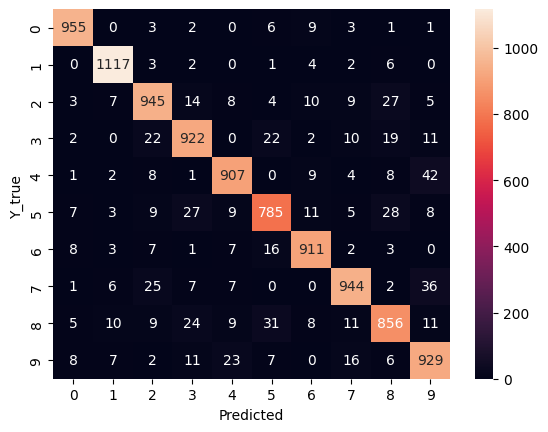

In [118]:
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Y_true ')

### Add Hidden Layers to decrease errors

In [119]:
model2 = models.Sequential([
    layers.Dense(50, input_shape=(X_train_flattend.shape[1],), activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2.fit(X_train_flattend, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8490 - loss: 0.5416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9475 - loss: 0.1756
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1241
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9725 - loss: 0.0957
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9765 - loss: 0.0796


using hidden layers increased my model accuracy from 0.92 -> 0.96

In [121]:
model2.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9624 - loss: 0.1215


[0.10354926437139511, 0.9679999947547913]

In [124]:
y_pred2 = model2.predict(X_test_flattend)
y_pred2[3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([9.9992794e-01, 3.6414110e-04, 4.0059263e-01, 2.0936398e-02,
       5.0824131e-03, 3.8856962e-03, 4.5097166e-01, 3.1477489e-02,
       9.1310685e-05, 1.7814833e-03], dtype=float32)

In [131]:
np.argmax(y_pred2[3])

np.int64(0)

Text(0.5, 1.0, '0')

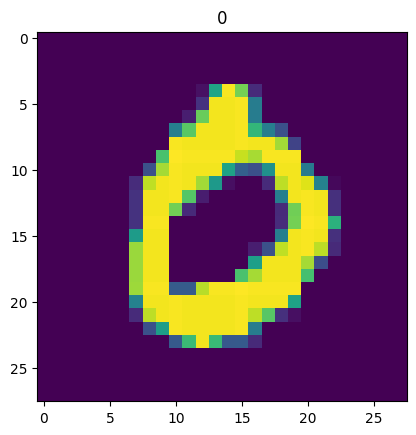

In [130]:
plt.imshow(X_test[3])
plt.title(y_test[3])

### Model2 Confusion Matrix

In [134]:
y_pred_labels2 = [np.argmax(i) for i in y_pred2]

In [137]:
conf_mat2  = tf.math.confusion_matrix(y_test, y_pred_labels2)

Text(50.722222222222214, 0.5, 'True Value')

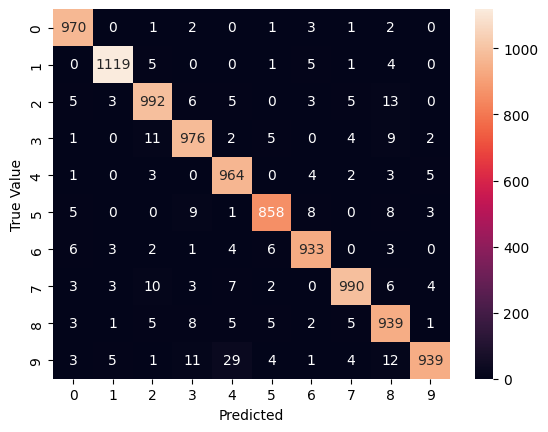

In [138]:
sns.heatmap(conf_mat2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')

### Flatten image shape from 2D to 1D using keras default method

In [140]:
model3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model3.fit(X_test, y_test, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7114 - loss: 1.0711
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9202 - loss: 0.2916
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9427 - loss: 0.2050
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9520 - loss: 0.1671
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9638 - loss: 0.1329
